## Hubble constant
### Method : (i) Plot receding velocity Vs Distance, (ii) Fit MSE line for the plot, (iii) slope gives H<sub>c</sub>

### Steps:

1. Download dataset and arrange columns
2. Import the dataset into this python code
3. Clean up the dataset (remove rows with missing / invalid values)
4. Plot Distance Vs Velocity (use scatterplot)


**Step 1:Download dataset and arrange columns**    

https://ned.ipac.caltech.edu/level5/NED1D/intro.html

Save the dataset as 'NED.xlsx' in the working directory.

**Step 2: Import the dataset into this python code **

In [1]:
# instead of arrays, we will use dataframes for the data
import pandas as pd
xls_file=pd.ExcelFile('NED.xlsx')
print(xls_file.sheet_names)

[u'Sheet1']


In [2]:
df = xls_file.parse('Sheet1')
print(df.columns) # displays columns names
df[:3] # displays first three rows alone

Index([u'Galaxy Name', u'm-M', u'err', u'Distance_Mpc', u'Method', u'REFCODE',
       u'Notes', u'RA', u'Dec', u'GLON', u'GLAT', u'Velocity_kmpersec',
       u'Type (RC3)'],
      dtype='object')


,Galaxy Name,m-M,err,Distance_Mpc,Method,REFCODE,Notes,RA,Dec,GLON,GLAT,Velocity_kmpersec,Type (RC3)
0,*GOODS J123655.45+621311.6,44.28*,0.31,3673.0,SNIa,2004ApJ...607..665R,"SN 2003es, z = 0.954",12:36:55.400000,+62:13:11.4,125.9,54.8,175349,-
1,*GOODS J123655.45+621311.6,44.30*,0.27,3707.0,SNIa,2006astro.ph.11572R,"SN 2003es, z = 0.954",12:36:55.400000,+62:13:11.4,125.9,54.8,175349,-
2,*MDS uhdfk-27,42.14*,0.19,1817.0,SNIa,2004ApJ...607..665R,"SN 2002dc, z = 0.47452",12:36:49.700000,+62:13:13.1,125.9,54.8,110900,-


As you see, we dont all those columns. 

All we need are distance,velocity, object type and obviously the object name.

Extract these columns alone. Rename columns for easy access.

In [25]:
data=df[['Galaxy Name','Distance_Mpc','Velocity_kmpersec','Method']] # extracts columns: 1,4,12,5 
#data
print(data.columns)

Index([u'Galaxy Name', u'Distance_Mpc', u'Velocity_kmpersec', u'Method'], dtype='object')


In [26]:
data.columns=['Object','Distance','Velocity','Type']  #rename column names
print(data.columns)
data[:5] # displays first five rows of columns:Distance and velocity

Index([u'Object', u'Distance', u'Velocity', u'Type'], dtype='object')


,Object,Distance,Velocity,Type
0,*GOODS J123655.45+621311.6,3673.0,175349,SNIa
1,*GOODS J123655.45+621311.6,3707.0,175349,SNIa
2,*MDS uhdfk-27,1817.0,110900,SNIa
3,*MDS uhdfk-27,1902.0,110900,SNIa
4,*MS 1133.7+1618,1802.0,108330,BL Lac M


Now, that we have the necessary data columns, let us look at the data and clean it.

** Section 3: Clean up the dataset (remove rows with missing / invalid values) **


In [51]:
%matplotlib inline 
# above command plots the graphs/plots in this document/page rather than on a separate window.
import numpy as np

# first extract the distance, velocity, type columns alone
df_data=data[['Distance','Velocity','Type']]
# It is common to have a few entries missing in the dataset.
# So, first and foremost, remove those rows which have atleast one missing entry
df_data=df_data.dropna(how='all')


Let us plot Distance Vs velocity.

Index([u'Distance', u'Velocity', u'Type'], dtype='object')


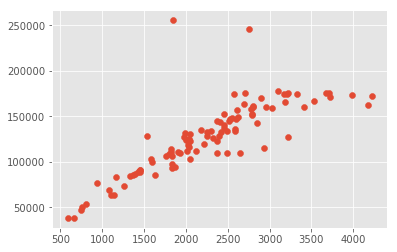

In [63]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') # gives a neat layout
print(df_data.columns)
df_data=df_data[pd.notnull(df_data)]
# plotting just few.
plt.scatter(df_data.Distance[:100],df_data.Velocity[:100]) 

In [67]:
# see the dimension before removing non-numeric entries
print(df_data.shape)
df_dist_vel=df_data[['Distance','Velocity']]

# check if the rows are all numeric or not. returns : 
# True (if all entries in that row are numeric), False (if atleast one entry is non-numeric)
okay_rows=df_dist_vel.applymap(np.isreal).all(1)
# retrieve only those rows that have all numeric entries.
df_data=df_data[okay_rows] 

# see the dimension, after removing rows with non-numeric entries
print(df_data.shape)

(4039, 3)
(4039, 3)


Plot Distance Vs Velocity again.

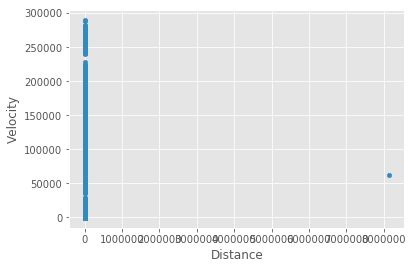

In [68]:
df_data.plot.scatter(x='Distance',y='Velocity')

The weirdness, is because of one datapoint entry which has very high Distance. Let us find and remove that entry,

In [69]:
# sort the 'Distance' column
df_data=df_data.sort_values('Distance')
print(df_data.tail(5)) # last five rows
df_data=df_data[:-1] # removes the last row (distance is too high).
df_data.tail(5) # display again, after removing the last row

      Distance Velocity      Type
184    11150.0   253073       GRB
182    13700.0   268198       GRB
392    13870.0   245566    HII LF
391    15200.0   265909    HII LF
344  8141008.0    62818  BL Lac M


,Distance,Velocity,Type
220,11040.0,270563,GRB
184,11150.0,253073,GRB
182,13700.0,268198,GRB
392,13870.0,245566,HII LF
391,15200.0,265909,HII LF


Let us plot the Distance Vs Velocity again. :P

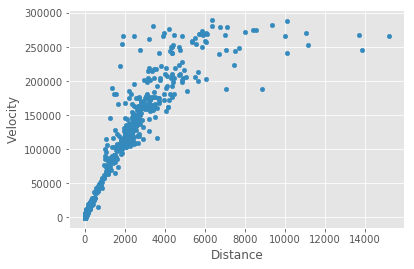

In [70]:
df_data.plot.scatter(x='Distance',y='Velocity')

Why is not perfectly linear? because, the value of Hc is changing. the Universe is expanding faster now, than it was in the past. i.e. Accelerating universe. So, to get present day Hc, we will take measurements done in close distances alone.

Tuning the plot.

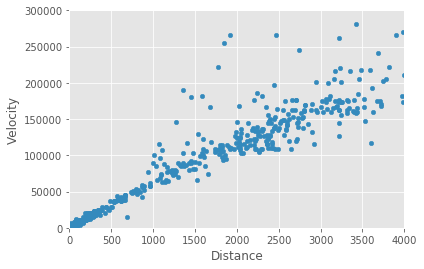

In [71]:
df_data.plot.scatter(x='Distance',y='Velocity', style='o',xlim=[0,4000],ylim=[0,3e5])

In [72]:
#x = [1,2,3,4]
#y = [3,5,7,10] # 10, not 9, so the fit isn't perfect


#df1.loc[lambda df: df.A > 0, :]

df_data_local=df_data.loc[lambda df_data: df_data.Distance < 600, :]
print(df_data_local.tail(5))

     Distance Velocity      Type
460     562.0    36555      SNIa
101     563.0    38144  BL Lac M
362     566.0    43201      SNIa
103     576.0    39316  BL Lac M
98      586.0    38540  BL Lac M


(3648,)
(3648,)
[ 66.15263668  50.32971971]


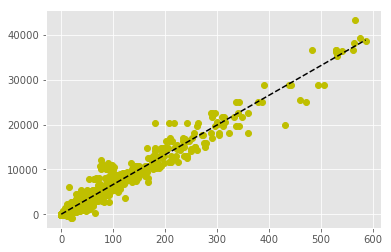

In [73]:
x=df_data_local['Distance'].values
y=df_data_local['Velocity'].values

print(x.shape)
print(y.shape)

fit = np.polyfit(x,y,1) # fits a straight line.
fit_fn = np.poly1d(fit)
print(fit)
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, fit_fn(x), '--k')

In [74]:
import astropy.units as u
# refer our FITS video/codes for explanations on units..

Hc = fit[0] * (u.km / u.second) / u.megaparsec # Hc=slope... unit: velocity/distance
print('Hubble contant : ')
print(Hc)


Hubble contant : 
66.1526366772 km / (Mpc s)


And, that is our ** Hubble constant**. 
Various other ways exist to fine tune the value of this. We will cover those in later codes/video